Homework Week 5 <br>
MSDS 600<br>
Bill Beemer<br>

Import Block

In [3]:
import pandas as pd
# import matplotlib.pyplot as plt
# import math
# import seaborn as sns
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# from scikitplot.estimators import plot_feature_importances

%matplotlib inline


Build dataframe from Prepped Churn Data

In [4]:
df = pd.read_csv('data/new_churn_data.csv', index_col='customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,charge_per_tenure
customerID,,,,,,,
9305-CKSKC,22,1,0,2,97.40,811.70,36.895455
1452-KNGVK,8,0,1,1,77.30,1701.95,212.743750
6723-OKKJM,28,1,0,0,28.25,250.90,8.960714
7832-POPKP,62,1,0,2,101.70,3106.56,50.105806
6348-TACGU,10,0,0,1,51.15,3440.97,344.097000


#### ANALYSIS<br>
It appears that Contract length is significant with tenure and monthly charges second as the three most important features

Dropping PhoneService to see if we can better results (also tried PhoneService and PaymentMethod, but this one was more in line with the assignment)

In [5]:
# new_features = features.drop(['PaymentMethod', 'PhoneService'], axis=1)
new_features = features.drop(['PhoneService'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(new_features, targets, stratify=targets, random_state=42)

rfc = RandomForestClassifier(max_depth=2, max_features=3, random_state=42)
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

NameError: name 'features' is not defined

After dropping PhoneService - there does not seem to be a drastic shift in test and train data accuracy

<Axes: title={'center': 'Feature Importance'}>

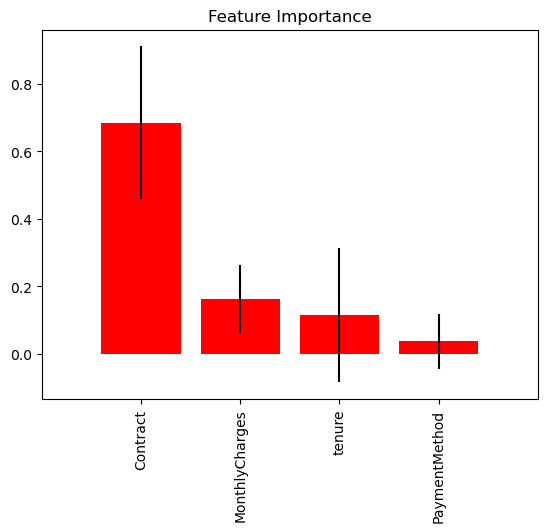

In [ ]:
plot_feature_importances(rfc, feature_names=new_features.columns, x_tick_rotation=90)

### ANALYSIS
<br>
After last weeks analysis I was certain that the monthly charge was the driving factor in Churn - but as this weeks lesson has shown - the MORE important feature is contract length - either month to month, one year or two year - the only options.  I am now curious about which contracts show the most Churn.  <br>
<br>
Above I was taking notes as I was going - so you may find some interesting analysis regarding why I droppped the TOTAL charges, since that feature seemed be to included in tenure and monthly charges and therefore was redundant.<br>
<br>
I also found that the default depth was 30 - wow! <br>
<br>
And finally, only removed the phoneservice feature (even though I also tested dropping PaymentMethod) - Once this was dropped, tenure and Monthly Payments swapped places behind contract type as important features. (and tenure displayed an even lower importance when PaymentMethod was also dropped, making the Contract length and MonthlyCharges appear to be the ONLY features playing a role.)<br>
